In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from qbstyles import mpl_style
mpl_style(dark=True)

In [ ]:
version = "v2" # TODO: MODIFICAR ESTE NOTEBOOK E RODAR PELA PRIMEIRA VEZ...

In [ ]:
df_train = pd.read_csv(f'../../data/processed/df_train_{version}.csv', index_col=[0])
df_test = pd.read_csv(f'../../data/processed/df_test_{version}.csv', index_col=[0])
display(f'Train: {df_train.shape}', df_train.head(), f'Test: {df_test.shape}', df_test.head())

In [6]:
model_ann = Sequential()
model_ann.add(Dense(units=6, activation='relu', input_shape=(6,)))
model_ann.add(Dense(units=6, activation='relu'))
model_ann.add(Dense(units=1, activation='sigmoid'))
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model_ann.fit(X_train_ss, Y_train, batch_size=32, epochs=100)

Epoch 1/100
300/300 [==============================] - 2s 3ms/step - loss: 0.6390 - accuracy: 0.6828
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 0.3691 - accuracy: 0.9717
Epoch 3/100
300/300 [==============================] - 1s 3ms/step - loss: 0.1586 - accuracy: 0.9757
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0834 - accuracy: 0.9790
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9822
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0541 - accuracy: 0.9847
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0486 - accuracy: 0.9858
Epoch 8/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0446 - accuracy: 0.9870
Epoch 9/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0418 - accuracy: 0.9880
Epoch 10/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0398 - accura

In [8]:
loss_train, acc_train = model_ann.evaluate(X_train_ss, Y_train, verbose=0)
print('Train loss:', loss_train)
print('Train acc:', acc_train)
loss_test, acc_test = model_ann.evaluate(X_test_ss, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test acc:', acc_test)

Train loss: 0.023300016298890114
Train acc: 0.9926041960716248
Test loss: 0.02420645020902157
Test acc: 0.9929196238517761


In [9]:
losses = pd.DataFrame(hist.history)
losses

,loss,accuracy
0,0.639026,0.682813
1,0.369149,0.971667
2,0.158632,0.975729
3,0.083432,0.978958
4,0.063862,0.982188
...,...,...
95,0.024068,0.992500
96,0.023757,0.992396
97,0.023596,0.992500
98,0.023440,0.992396


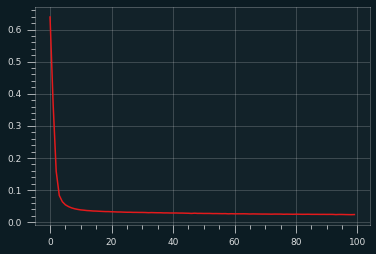

In [10]:
plt.plot(hist.history['loss'])

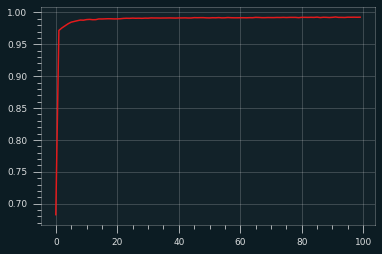

In [11]:
plt.plot(hist.history['accuracy'])

In [45]:
Y_train_pred = model_ann.predict(X_train_ss)
Y_test_pred = model_ann.predict(X_test_ss)
Y_train_pred = np.where(Y_train_pred < 0.5, 0, 1)
Y_test_pred = np.where(Y_test_pred < 0.5, 0, 1)
Y_train_pred = np.reshape(Y_train_pred,len(Y_train_pred))
Y_test_pred = np.reshape(Y_test_pred,len(Y_test_pred))
cmf_train = confusion_matrix(Y_train, Y_train_pred)
cmf_test = confusion_matrix(Y_test, Y_test_pred)

76/76 [==============================] - 0s 3ms/step


<AxesSubplot:>

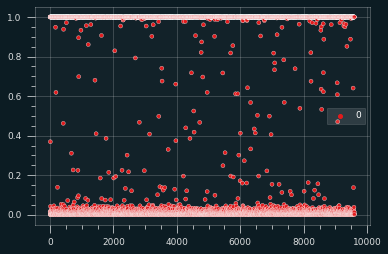

In [24]:
sns.scatterplot(data=pd.DataFrame(Y_train_pred))

In [42]:
#np.where(Y_train_pred < 0.5, 0, 1).shape#,len(Y_train_pred)
np.reshape(np.where(Y_train_pred < 0.5, 0, 1),len(Y_train_pred)).shape

(9600,)

In [44]:
Y_train.shape

(9600,)

Text(0.5, 1.0, 'Confusion Matrix from training set')

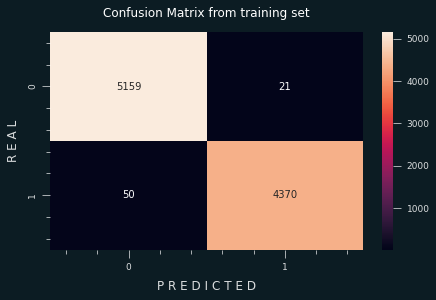

In [48]:
plt.figure(figsize=(7,4))
sns.heatmap(cmf_train, annot=True, fmt='d', linecolor='gray')
plt.xlabel('P R E D I C T E D')
plt.ylabel('R E A L')
plt.title('Confusion Matrix from training set')

In [54]:
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5180
           1       1.00      0.99      0.99      4420

    accuracy                           0.99      9600
   macro avg       0.99      0.99      0.99      9600
weighted avg       0.99      0.99      0.99      9600



Text(0.5, 1.0, 'Confusion Matrix from test set')

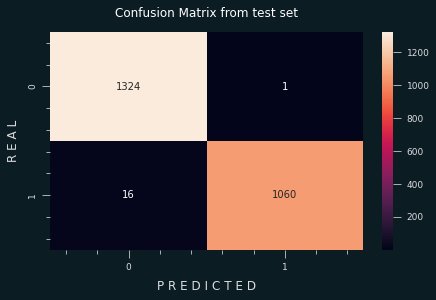

In [49]:
plt.figure(figsize=(7,4))
sns.heatmap(cmf_test, annot=True, fmt='d', linecolor='gray')
plt.xlabel('P R E D I C T E D')
plt.ylabel('R E A L')
plt.title('Confusion Matrix from test set')

In [55]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1325
           1       1.00      0.99      0.99      1076

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401

